In [26]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy as sym

In [27]:
# Numeric values of partial derivatives of theta and I_dot calculated in system_derivation.ipynb
A = -2911.22409992101
B = -16.0791589363018
C = 0.662228074503118
D = 0
E = -15158.8218607722
F = 6.89037357307828
s = ctrl.TransferFunction.s

Gx = (C * F) / ((s ** 3) - s ** 2 * (B + E) - s * (A - B * E) + A * E)
Gx

TransferFunction(array([4.56299882]), array([1.00000000e+00, 1.51749010e+04, 2.46652330e+05, 4.41307275e+07]))

In [28]:
Km = 1
Tm = 0.03
# Transfer function for the sensor measuring the position of the ball, acts as a 30ms delay back to the PID controller
Gs = (Km) / (Tm*s + 1)
Gs

TransferFunction(array([1]), array([0.03, 1.  ]))

In [39]:
Kp = 980
Ki = 1
Kd = 10
Gc = Kp + Ki/s + Kd*s
Gc

TransferFunction(array([ 10, 980,   1]), array([1, 0]))

/Users/unisira/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=9.8178e-23): result may not be accurate.
  return solve(Q, P)


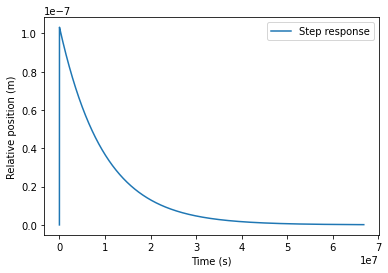

In [40]:
#                                           _______
#                                 D ------ |   Gd  |
#                                          |_______|
#                                              |
#        +           ______        ______   +  v +
# V ------>( ) ---> |  Gx  |------|  Gc  |--->( )------- X
#         - ^       |______|      |______|          |
#           |               ________                |
#           |              |   Gs   |               |
#            --------------|________|----------------

# Disturbance transfer function, equal to Gx
Gd = Gx

# Derivation shown in report
Gload = (Gd) / (1 + Gs * Gc * Gx)
Gload

t_step, d_step = ctrl.step_response(Gload)

plt.plot(t_step, d_step, label='Step response')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Relative position (m)')
plt.show()